# LGMVIP TASK 4- DIGIT CLASSIFICATION USING TENSORFLOW AND KERAS

**1. Import the necessary libraries**

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#import tensorflow_datasets as tfds
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**2.Load and allocate train and test data to dataset**

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

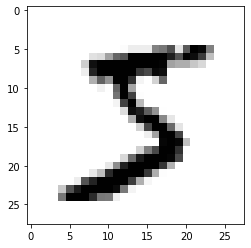

In [10]:
print(x_train[0]) # The label is 5
plt.imshow(x_train[0], cmap=plt.cm.binary)

**3. Preprocessing the dataset**

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Convert values to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


**4. Creating the CNN model using keras**

In [16]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

**5.Compile and Execute the model**

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.2317 - accuracy: 0.9292
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0995 - accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0714 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0561 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9851


In [18]:
loss,accuracy=model.evaluate(x_test, y_test)
print("loss: ",loss)
print("accuracy: ",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9759
loss:  0.09140811860561371
accuracy:  0.9758999943733215


**6. Save the model**

In [19]:
model.save('digit_classification-mnist.model')

INFO:tensorflow:Assets written to: digit_classification-mnist.model\assets


In [20]:
new_model=tf.keras.models.load_model('digit_classification-mnist.model')

**7.Use the model to make predictions**

2


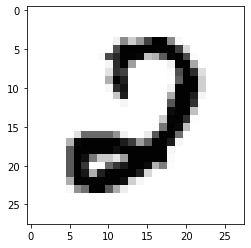

In [22]:
plt.imshow(x_test[400].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[400].reshape(1, 28, 28, 1))
print(pred.argmax())